In [1]:
%matplotlib inline
import nltk
import pandas as pd
# these lines download the models and really only need to be run once ever
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('maxent_ne_chunker')
nltk.download('words') 
nltk.download('treebank')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/pbutler/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/pbutler/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/pbutler/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/pbutler/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/pbutler/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     /Users/pbutler/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pbutler/nltk_data...
[nltk_data]   

True

In [2]:
with open('news_1.txt') as f:
    news = f.read().strip()

# Word Tokenization

In [3]:
words = nltk.word_tokenize(news)
print(words[0:10])

['What', 'is', 'a', 'Hokie', '?', 'The', 'origin', 'of', 'the', 'word']


# Sentence Tokenization

In [4]:
sents = nltk.sent_tokenize(news)
for i, sent in enumerate(sents):
    print('SENTENCE {} IS : {}'.format(i,sent))

SENTENCE 0 IS : What is a Hokie?
SENTENCE 1 IS : The origin of the word "Hokie" has nothing to do with a turkey.
SENTENCE 2 IS : It was coined by O.M.
SENTENCE 3 IS : Stull (class of 1896), who used it in a spirit yell he wrote for a competition.
SENTENCE 4 IS : Here's how that competition came to be.
SENTENCE 5 IS : Virginia Tech was founded in 1872 as a land-grant institution and was named Virginia Agricultural and Mechanical College.
SENTENCE 6 IS : In 1896, the Virginia General Assembly officially changed the college's name to Virginia Agricultural and Mechanical College and Polytechnic Institute, a name so long that people shortened it in popular usage to VPI.
SENTENCE 7 IS : The original college cheer, which made reference to the original name of the institution, was no longer suitable.
SENTENCE 8 IS : So a contest was held to select a new spirit yell, and Stull won the $5 top prize for his cheer, now known as Old Hokie:

Hoki, Hoki, Hoki, Hy.
SENTENCE 9 IS : Techs, Techs, V.P.I.

# Stopword Removal

In [5]:
from nltk.corpus import stopwords
sws = set(stopwords.words('english'))
for j,sent in enumerate(sents):
    print('SENTENCE {} WITHOUT STOPWORDS: {}'.format(j, ' '.join([i for i in sent.lower().split() if i not in sws])))

SENTENCE 0 WITHOUT STOPWORDS: hokie?
SENTENCE 1 WITHOUT STOPWORDS: origin word "hokie" nothing turkey.
SENTENCE 2 WITHOUT STOPWORDS: coined o.m.
SENTENCE 3 WITHOUT STOPWORDS: stull (class 1896), used spirit yell wrote competition.
SENTENCE 4 WITHOUT STOPWORDS: here's competition came be.
SENTENCE 5 WITHOUT STOPWORDS: virginia tech founded 1872 land-grant institution named virginia agricultural mechanical college.
SENTENCE 6 WITHOUT STOPWORDS: 1896, virginia general assembly officially changed college's name virginia agricultural mechanical college polytechnic institute, name long people shortened popular usage vpi.
SENTENCE 7 WITHOUT STOPWORDS: original college cheer, made reference original name institution, longer suitable.
SENTENCE 8 WITHOUT STOPWORDS: contest held select new spirit yell, stull $5 top prize cheer, known old hokie: hoki, hoki, hoki, hy.
SENTENCE 9 WITHOUT STOPWORDS: techs, techs, v.p.i.
SENTENCE 10 WITHOUT STOPWORDS: sola-rex, sola-rah.
SENTENCE 11 WITHOUT STOPWORDS:

# POS Tag

In [6]:
tagged_tokens = nltk.pos_tag(words)
print(tagged_tokens[0:10])

[('What', 'WP'), ('is', 'VBZ'), ('a', 'DT'), ('Hokie', 'NNP'), ('?', '.'), ('The', 'DT'), ('origin', 'NN'), ('of', 'IN'), ('the', 'DT'), ('word', 'NN')]


In [7]:
tagged_tokens = nltk.pos_tag(words, tagset='universal')
print(tagged_tokens[0:10])

[('What', 'PRON'), ('is', 'VERB'), ('a', 'DET'), ('Hokie', 'NOUN'), ('?', '.'), ('The', 'DET'), ('origin', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('word', 'NOUN')]


# Named-Entity Extraction

In [8]:
from collections import defaultdict
def nltk_entities(text):
    """
    Extract entities using the NLTK named entity chunker.
    """
    text = nltk.pos_tag(nltk.word_tokenize(text))
    results = defaultdict(list)
    lst_results = []
    for entity in nltk.ne_chunk(text):
        if isinstance(entity, nltk.tree.Tree):
            etext = " ".join([word for word, tag in entity.leaves()])
            label = entity.label()
        else:
            continue

        if label == 'PERSON':
            key = 'persons'
        elif label == 'ORGANIZATION':
            key = 'organizations'
        elif label == 'LOCATION':
            key = 'locations'
        elif label == 'GPE':
            key = 'other'
        else:
            key = None

        if key:
            results[key].append(etext)
            lst_results.append(etext)

    return lst_results

In [9]:
for i,sent in enumerate(sents):
    print("Named-Entities in sentence {}: {}".format(i,nltk_entities(sent)))

Named-Entities in sentence 0: []
Named-Entities in sentence 1: []
Named-Entities in sentence 2: []
Named-Entities in sentence 3: ['Stull']
Named-Entities in sentence 4: []
Named-Entities in sentence 5: ['Virginia', 'Tech', 'Virginia Agricultural', 'Mechanical College']
Named-Entities in sentence 6: ['Virginia', 'Virginia', 'Mechanical College', 'Polytechnic Institute', 'VPI']
Named-Entities in sentence 7: []
Named-Entities in sentence 8: ['Stull', 'Old', 'Hoki', 'Hoki', 'Hoki', 'Hy']
Named-Entities in sentence 9: ['Techs', 'Techs']
Named-Entities in sentence 10: []
Named-Entities in sentence 11: ['Polytechs']
Named-Entities in sentence 12: ['Rae', 'Ri']
Named-Entities in sentence 13: []
Named-Entities in sentence 14: ['Team']
Named-Entities in sentence 15: ['Team']
Named-Entities in sentence 16: []


# Word Stemming

In [10]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
for j,sent in enumerate(sents):
    print('SENTENCE {} WITH STEMMING: {}'.format(j, ' '.join([stemmer.stem(i) for i in sent.lower().split()])))

SENTENCE 0 WITH STEMMING: what is a hokie?
SENTENCE 1 WITH STEMMING: the origin of the word "hokie" ha noth to do with a turkey.
SENTENCE 2 WITH STEMMING: it wa coin by o.m.
SENTENCE 3 WITH STEMMING: stull (class of 1896), who use it in a spirit yell he wrote for a competition.
SENTENCE 4 WITH STEMMING: here' how that competit came to be.
SENTENCE 5 WITH STEMMING: virginia tech wa found in 1872 as a land-grant institut and wa name virginia agricultur and mechan college.
SENTENCE 6 WITH STEMMING: in 1896, the virginia gener assembl offici chang the college' name to virginia agricultur and mechan colleg and polytechn institute, a name so long that peopl shorten it in popular usag to vpi.
SENTENCE 7 WITH STEMMING: the origin colleg cheer, which made refer to the origin name of the institution, wa no longer suitable.
SENTENCE 8 WITH STEMMING: so a contest wa held to select a new spirit yell, and stull won the $5 top prize for hi cheer, now known as old hokie: hoki, hoki, hoki, hy.
SENTENCE

# Twitter Analysis

Besides the examples here it's worth reading the documentation on extended tweets [here](http://docs.tweepy.org/en/latest/extended_tweets.html).  Additionally you will have to supply your own credentials in the cells below.

In [11]:
from tweepy import Stream
from tweepy import OAuthHandler
import json
import tweepy

# --
# Note : if conda install tweepy fails
# Try : pip install tweepy
# you might also try running (once and only once) in a notebook
# import pip
# pip.main(["install", "tweepy"])
# --

Streaming live tweets

In [12]:
bearer = "PUT YOUR BEARER TOKEN HERE"

This is the streaming example and will continue until you interrupt it or hits 10 tweets.  It will stream tweets in real time.

In [13]:
class Listener(tweepy.StreamingClient):
    def __init__(self, bearer, maxtweets=10):
        super().__init__(bearer)
        self._maxtweets = maxtweets
        self._ntweets = 0

    def on_tweet(self, tweet):
        text = tweet.text
        print("{}: {}".format(tweet.created_at, text))
        self._ntweets += 1
        if self._ntweets >= self._maxtweets:
            self.disconnect() 
            
twitterStream = Listener(bearer)

#old rules are stored on the server so we delete them if they are there
print("Checking for and deleting old_rules...")
old_rules = twitterStream.get_rules().data
if old_rules:
    old_rules = [rule.id for rule in old_rules]
    twitterStream.delete_rules(old_rules)

#add new rules
print("Adding rules...")
twitterStream.add_rules(tweepy.StreamRule('kittens'))
print("Starting....")
twitterStream.filter(tweet_fields=["created_at", "public_metrics", "entities"])

Checking for and deleting old_rules...
Adding rules...
Starting....
2023-03-20 21:03:23+00:00: RT @beatleshourly: john with kittens &lt;3 https://t.co/aZmpu5NY61
2023-03-20 21:03:25+00:00: RT @Foster_Fluff: #Ren and #Daffodil think they are the best hunters. #kittens #CatsOfTwitter https://t.co/F3wbwVf3Ma
2023-03-20 21:03:31+00:00: curtam kittens https://t.co/vI789L8wdu
2023-03-20 21:03:47+00:00: @VHKAnsfweer Lovely kittens :3
2023-03-20 21:04:03+00:00: RT @jenniethinker: a babybearkitty who loves kittens a lot 🐱♡ https://t.co/RPu99f3pTB
2023-03-20 21:04:07+00:00: RT @RescueCare: To All My Friends💖 Someone called me📞 and told me that there are four motherless kittens.😺😭🆘💔
immersed in rainwater. I imme…
2023-03-20 21:04:11+00:00: RT @Foster_Fluff: #Poppy tries to turn the milk bar into a playground. #Buttercup won’t have it 😂 #SoundOn 🔊 #kittens #CatsOfTwitter https:…
2023-03-20 21:04:34+00:00: RT @Lawyer_Animal1: 🔄update
We feed a lot of homeless cats in several areas, I tweeted about 

Stream connection closed by Twitter


2023-03-20 21:04:46+00:00: @jessica_kirsh @ivan4th @TractorSupply You need the drops based on Selamectin, such as this one, Stronghold https://t.co/IgQDtEahlw
(not sure whether this brand is available in US, but likely there are similar preparations available)
Note that the specified weight for the particular drug is important!


This will search and download historical tweets:

In [14]:
client = tweepy.Client(bearer_token=bearer, wait_on_rate_limit=True)


def get_tweets(client, input_query, n=1000):
    """
    This collects tweets and associated metadata as well as including associating
    users metadata with the tweet.
    """
    page_size = 100
    pages = n // 100 + 1
    i = 0
    for tweet_batch in tweepy.Paginator(client.search_recent_tweets, input_query,
                                  tweet_fields=["created_at", "public_metrics", "entities"],
                                   expansions=["author_id"],
                                  user_fields=["username", "public_metrics"],
                                  max_results=page_size, limit=pages):
        # user data is sent in a package alongside the returned tweets
        user_lookup = {u.id: u.data for u in tweet_batch.includes["users"]}
        for tweet in tweet_batch.data:
            data = tweet.data
            # 
            data["author"] = user_lookup[tweet.author_id]
            i += 1
            yield tweet
            # stop exactly at the nth tweet otherwise the api will return the rest
            # of the data from the same page.
            if i == n:
                return
            

input_query = '"Virginia Tech"' # -is:retweet'
tweets = list(get_tweets(client, input_query))
print(json.dumps(tweets[1].data, indent=2))

{
  "entities": {
    "annotations": [
      {
        "start": 19,
        "end": 31,
        "probability": 0.4413,
        "type": "Organization",
        "normalized_text": "Miami Mashers"
      },
      {
        "start": 40,
        "end": 44,
        "probability": 0.4064,
        "type": "Organization",
        "normalized_text": "Canes"
      }
    ],
    "mentions": [
      {
        "start": 3,
        "end": 17,
        "username": "CanesBaseball",
        "id": "165764237"
      },
      {
        "start": 69,
        "end": 82,
        "username": "NCAABaseball",
        "id": "41404125"
      }
    ]
  },
  "text": "RT @CanesBaseball: Miami Mashers \ud83d\udcaa\n\nThe Canes are tied for fourth in @NCAABaseball with 45 home runs!\n\nIn Saturday's 21-6 thrashing over th\u2026",
  "id": "1637922079336017922",
  "public_metrics": {
    "retweet_count": 22,
    "reply_count": 0,
    "like_count": 0,
    "quote_count": 0,
    "impression_count": 0
  },
  "edit_history_tweet_id

In [15]:
#download english tweets in extended moded, get the first 1000
dt = []
for tweet in get_tweets(client, input_query):
    dt += [tweet.data]
dt = pd.json_normalize(dt)
#drop unneed metadata and turn it into a list, you can apply this to other listlike fields
dt["entities.hashtags"] = dt["entities.hashtags"].apply(lambda r: [] if not isinstance(r, list) else r)
dt["entities.hashtags"] = dt["entities.hashtags"].apply(lambda r: [h["tag"] for h in r])

dt.to_json("tweets-nlp.jsonl", orient="records", lines=True)

In [16]:
dt = pd.read_json("tweets-nlp.jsonl", lines=True)

In [17]:
dt["entities.hashtags"]

0                  []
1                  []
2                  []
3                  []
4                  []
            ...      
995                []
996                []
997    [MarchMadness]
998          [Hokies]
999          [Hokies]
Name: entities.hashtags, Length: 1000, dtype: object

Load the data into a pandas dataframe for easy manipluation and graphing

In [18]:
dt[['created_at','text','entities.hashtags','author.username','author.public_metrics.followers_count']].head()

,created_at,text,entities.hashtags,author.username,author.public_metrics.followers_count
0,2023-03-20 21:03:36+00:00,Damn only fans killed 19 children at an elemen...,[],AlliGraz,2963
1,2023-03-20 21:00:29+00:00,RT @CanesBaseball: Miami Mashers 💪\n\nThe Cane...,[],GoldCane,946
2,2023-03-20 20:58:31+00:00,RT @JamieShaw5: UNC freshman transfer Tyler Ni...,[],_JT_Smith,1944
3,2023-03-20 20:53:32+00:00,RT @ABCTPFSIG: Delshad Shroff is a grad studen...,[],drvernig,10971
4,2023-03-20 20:51:40+00:00,Duke loses to Virginia Tech after lengthy revi...,[],melissa_moises,3


Plot a histograms of the number of tweets being retweeted

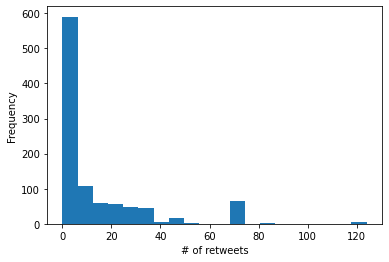

In [19]:
import matplotlib.pyplot as plt
ax = dt['public_metrics.retweet_count'].plot.hist(bins=20)
ax.set_xlabel("# of retweets")
plt.show()

Plot the 95th percentile of the same

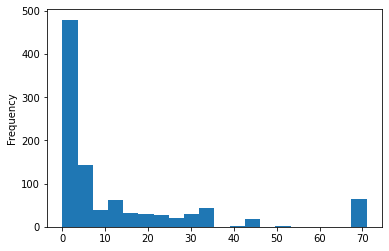

In [20]:
import numpy as np
filtered_df = dt[dt['public_metrics.retweet_count'] <= np.percentile(dt['public_metrics.retweet_count'], 95)]
filtered_df['public_metrics.retweet_count'].plot.hist(bins=20)
plt.show()

In [21]:
from collections import Counter
hashtag_counter = Counter()
for hts in dt['entities.hashtags'].values:
    hts = [t for t in hts if len(t) > 0]
    hashtag_counter.update(hts)

In [22]:
import operator
sorted_cntr = sorted(hashtag_counter.items(), key=lambda x: x[1],reverse=True)
for tag in hashtag_counter.most_common(10):
    print(tag)

('Hokies', 62)
('ThisIsHome', 21)
('Bearcats', 19)
('NFL', 13)
('Steelers', 12)
('MarchMadness', 9)
('VTBOV', 8)
('Hokie', 8)
('Bills', 7)
('VirginiaTech', 5)


Build a new dataframe with just the tweets containing a tag with hokies in it

In [23]:
hokie_ht = dt[dt['entities.hashtags'].apply(lambda x: 'hokies' in x)]
len(hokie_ht)

2

In [24]:
entities_cntr = Counter()
for ht in hokie_ht['text'].values:
    entities_cntr.update(nltk_entities(ht))  # use nltk to extract entities

for tag in entities_cntr.most_common(10):
    print(tag)

('Virginia', 1)
('Tech Hokies', 1)
('WIDE', 1)
('Neck Gaiters', 1)
('Maryland', 1)
('Virginia Tech', 1)
('MarchMadness', 1)


In [25]:
edf = pd.DataFrame.from_dict(dict(entities_cntr.most_common(10)), columns=["count"], orient="index")
edf

,count
Virginia,1
Tech Hokies,1
WIDE,1
Neck Gaiters,1
Maryland,1
Virginia Tech,1
MarchMadness,1


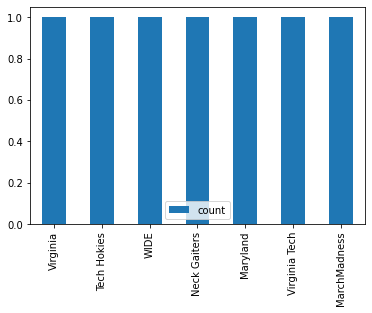

In [26]:
edf.plot.bar();